In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [33]:
df1 = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")
df1

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## we don't have any null values in "Dataset" 

sns.barplot(x='mean',y='Dystopia Residual',data=df.nlargest(30,'Generosity'),ax=axes[0],palette='Spectral')


[]

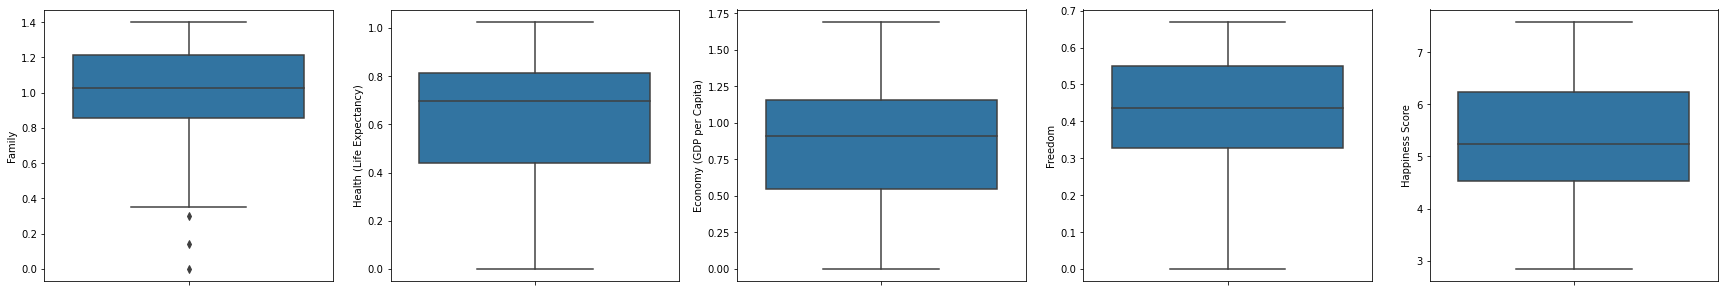

In [39]:
plt.figure(figsize=(30,5))
plt.subplot(1,5,1)
sns.boxplot(y = df1['Family'])
plt.subplot(1,5,2)
sns.boxplot(y = df1['Health (Life Expectancy)'])
plt.subplot(1,5,3)
sns.boxplot(y = df1['Economy (GDP per Capita)'])
plt.subplot(1,5,4)
sns.boxplot(y = df1['Freedom'])
plt.subplot(1,5,5)
sns.boxplot(y = df1['Happiness Score'])
plt.plot()

[]

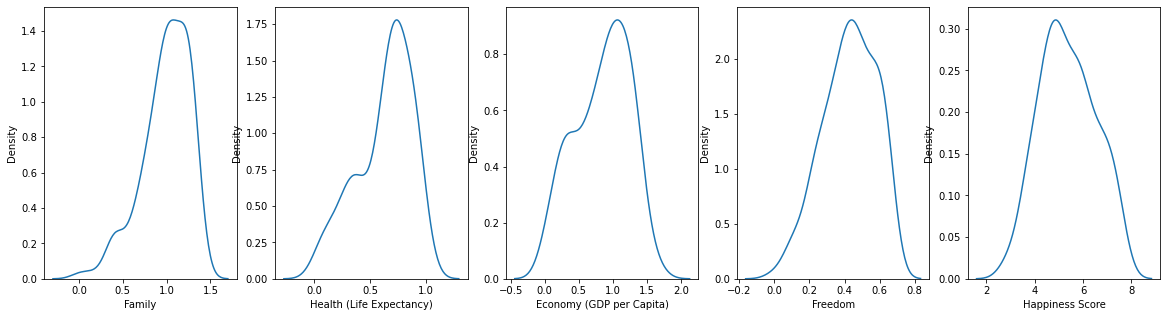

In [10]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.kdeplot(x = df1['Family'])
plt.subplot(1,5,2)
sns.kdeplot(x = df1['Health (Life Expectancy)'])
plt.subplot(1,5,3)
sns.kdeplot(x = df1['Economy (GDP per Capita)'])
plt.subplot(1,5,4)
sns.kdeplot(x = df1['Freedom'])
plt.subplot(1,5,5)
sns.kdeplot(x = df1['Happiness Score'])
plt.plot()

[]

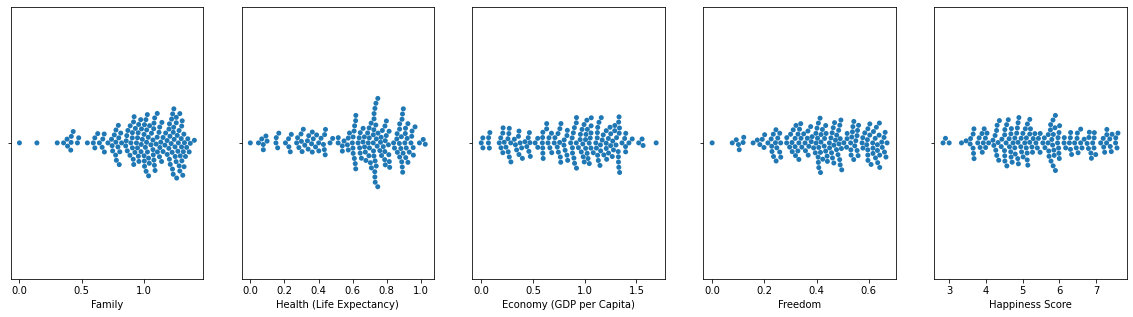

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(1,5,1)
sns.swarmplot(x = df1['Family'])
plt.subplot(1,5,2)
sns.swarmplot(x = df1['Health (Life Expectancy)'])
plt.subplot(1,5,3)
sns.swarmplot(x = df1['Economy (GDP per Capita)'])
plt.subplot(1,5,4)
sns.swarmplot(x = df1['Freedom'])
plt.subplot(1,5,5)
sns.swarmplot(x = df1['Happiness Score'])
plt.plot()

<AxesSubplot:>

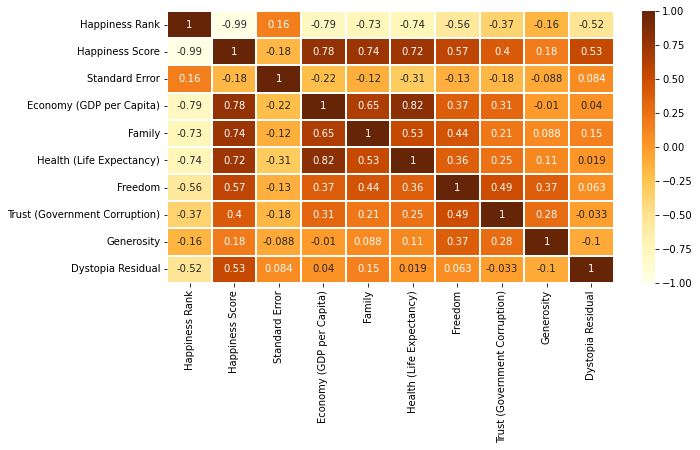

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(), annot=True, cmap="YlOrBr", vmin=-1, vmax=1, linewidths=.2)

#it is clearly seen that Economy (GDP per Capita), 'Family' and Healthy (Life Expectancy) are the main factors for the country happiness.

##Freedom to make life choices and Generosity are the least co-related with any other factors.

#Have expected Perception of Trust (Government Corruption) should be negatively co-related with the Happiness Score but it is not.

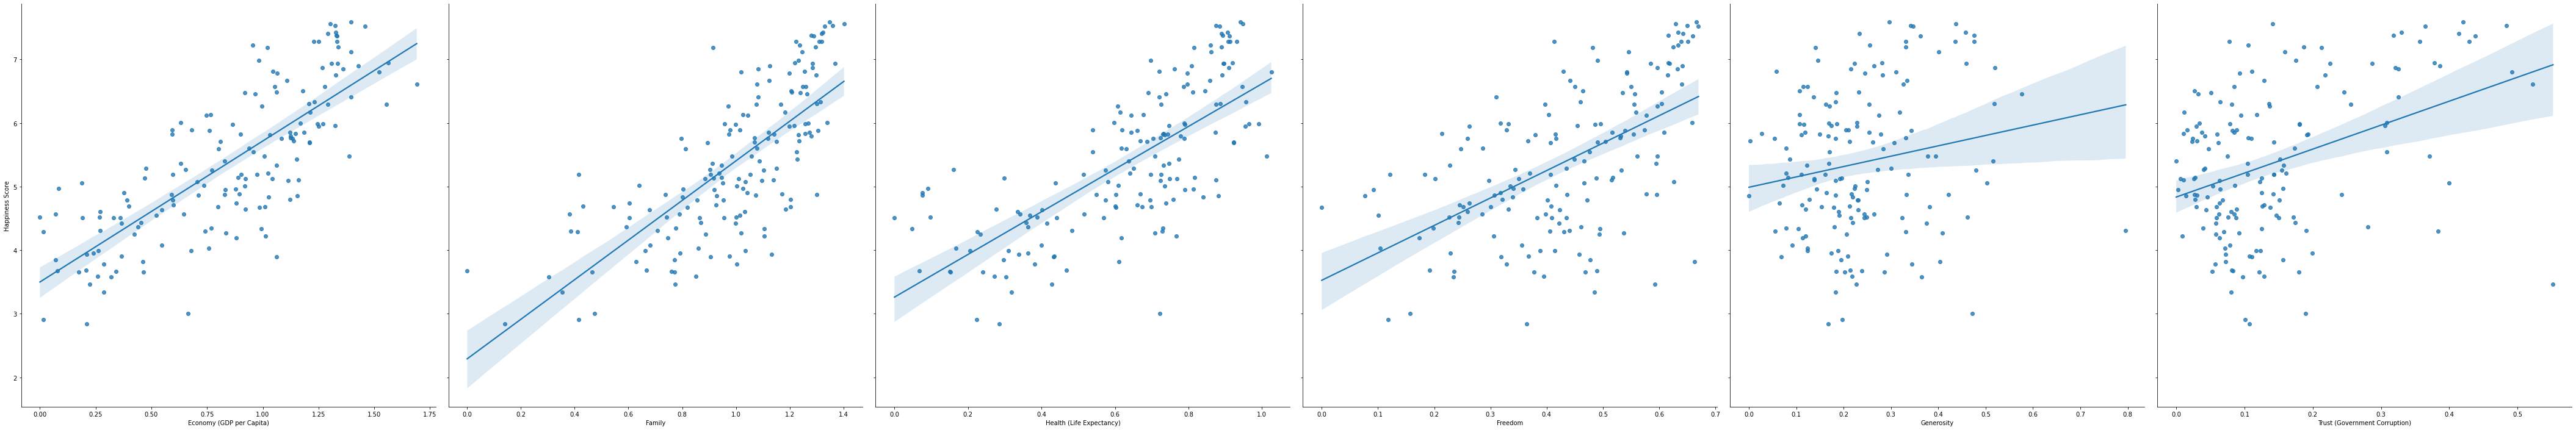

In [22]:
g = sns.PairGrid(data =df1,x_vars=['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Generosity',
                                     'Trust (Government Corruption)'], y_vars='Happiness Score',height = 10)
g.map(sns.regplot)
plt.show()

#Country with more perception to Government corruption is holding the high score

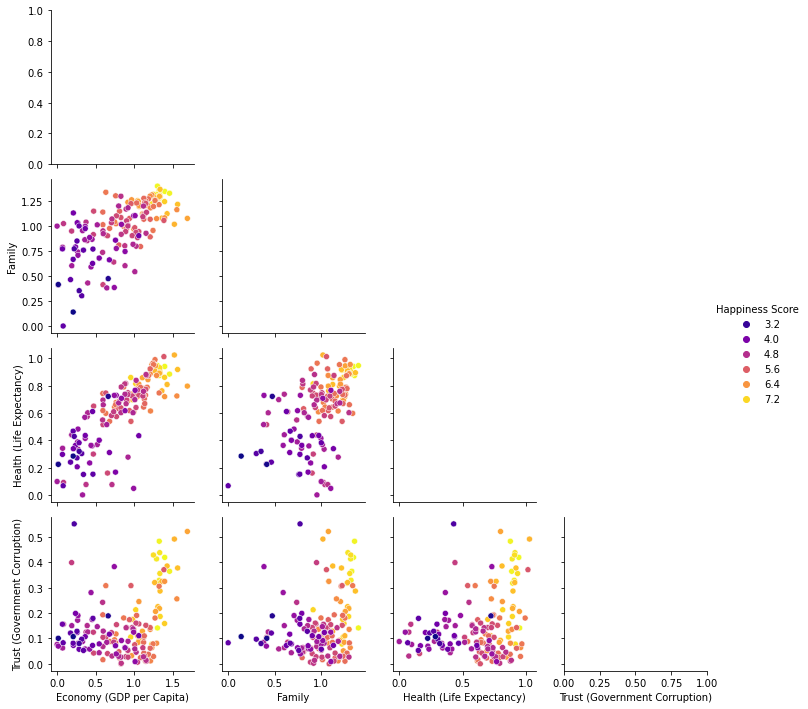

In [31]:
g = sns.PairGrid(data = df1, vars = ['Economy (GDP per Capita)','Family','Health (Life Expectancy)',
                                      'Trust (Government Corruption)'], 
                 hue = 'Happiness Score', diag_sharey=False, corner = True, palette = 'plasma')
g.map_lower(sns.scatterplot)
g.add_legend()

#Country with high perception of Government corruption is combinely co-related with Happiness score and each of that in Economy(GDP per Capita), 'Family' and Healthy (Life Expectancy) respectively.